In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
Created on Wed Jun 23 20:09:54 2021

@author: Arjuna Panji Prakarsa
"""

# install the libraries
import sys
!{sys.executable} -m pip install numpy 
!{sys.executable} -m pip install matplotlib 
!{sys.executable} -m pip install pandas

# import the libraries
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [3]:
def plot_series(series1, series2):
    plt.figure(figsize=(12,6))
    plt.plot(series1, color='orange')
    plt.plot(series2,color='green')
    plt.ylabel('Windspeed', fontsize=16)
    plt.legend(['Tondano', 'Winangun'], fontsize=16)

    for year in range(2010, 2020):
        plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)

In [4]:
# read the data
dfTondano = pd.read_csv('cleaned_dataset_tondano.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
dfWinangun = pd.read_csv('cleaned_dataset_winangun.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
#print (dfTondano[pd.to_numeric(dfTondano['windspeed'], errors='coerce').isnull()])

In [5]:
dfTondano

time
2010-01-01     0.0
2010-01-06     6.3
2010-01-07    26.1
2010-01-08     7.9
2010-01-11     0.8
              ... 
2018-12-26    12.1
2018-12-27     5.1
2018-12-28    11.0
2018-12-29    13.2
2018-12-30     1.0
Name: windspeed, Length: 2162, dtype: float64

In [6]:
dfWinangun

time
2010-01-01     0.0
2010-01-02     0.0
2010-01-06    15.9
2010-01-07     9.5
2010-01-08    13.1
              ... 
2018-12-27     0.0
2018-12-28    28.0
2018-12-29     6.0
2018-12-30     8.5
2018-12-31     4.0
Name: windspeed, Length: 1856, dtype: float64

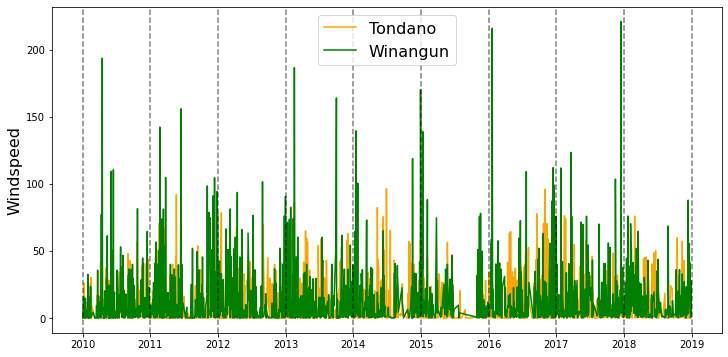

In [7]:
plot_series(dfTondano, dfWinangun)
plt.savefig('output_postprocessing/sample1.png')

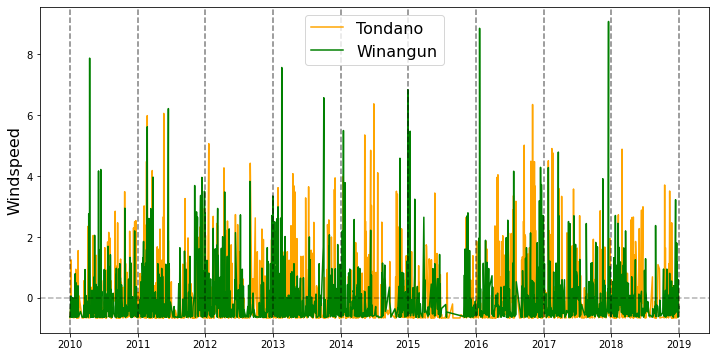

In [8]:
# Normalize
tondano_avg, tondano_dev = dfTondano.mean(), dfTondano.std()
dfTondano = (dfTondano - tondano_avg) / tondano_dev

winangun_avg, winangun_dev = dfWinangun.mean(), dfWinangun.std()
dfWinangun = (dfWinangun - winangun_avg) / winangun_dev

plot_series(dfTondano, dfWinangun)
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.savefig('output_postprocessing/sample2.png')

In [9]:
# Take First Difference to Remove Trend
dfTondano = dfTondano.diff().dropna()
dfWinangun = dfWinangun.diff().dropna()

In [10]:
dfTondano

time
2010-01-06    0.460113
2010-01-07    1.446068
2010-01-08   -1.329214
2010-01-11   -0.518540
2010-01-12    0.248315
                ...   
2018-12-26    0.000000
2018-12-27   -0.511236
2018-12-28    0.430899
2018-12-29    0.160674
2018-12-30   -0.891012
Name: windspeed, Length: 2161, dtype: float64

In [11]:
dfWinangun

time
2010-01-02    0.000000
2010-01-06    0.698820
2010-01-07   -0.281286
2010-01-08    0.158223
2010-01-09   -0.575757
                ...   
2018-12-27   -0.439509
2018-12-28    1.230626
2018-12-29   -0.966920
2018-12-30    0.109877
2018-12-31   -0.197779
Name: windspeed, Length: 1855, dtype: float64

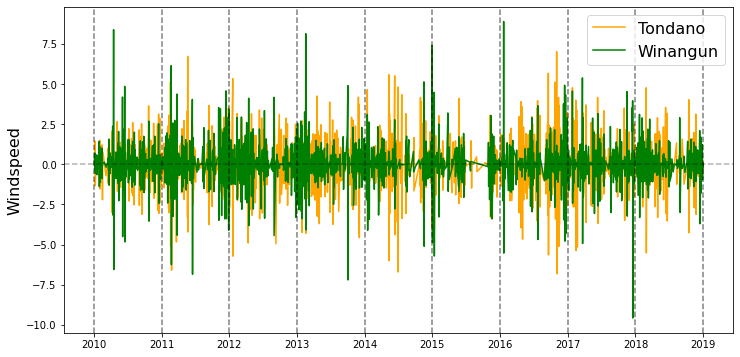

In [12]:
plot_series(dfTondano, dfWinangun)
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.savefig('output_postprocessing/sample3.png')

In [13]:
tondano_annual_volatility = dfTondano.groupby(dfTondano.index.year).std()
tondano_annual_volatility

time
2010    1.019155
2011    1.393300
2012    1.306386
2013    1.346440
2014    1.554418
2015    1.008759
2016    1.724304
2017    1.277567
2018    1.245462
Name: windspeed, dtype: float64

In [14]:
winangun_annual_volatility = dfWinangun.groupby(dfWinangun.index.year).std()
winangun_annual_volatility

time
2010    1.204723
2011    1.481844
2012    1.134395
2013    1.311579
2014    1.255489
2015    1.266119
2016    1.501747
2017    1.340636
2018    0.995127
Name: windspeed, dtype: float64

In [15]:
tondano_annual_vol = dfTondano.index.map(lambda d: tondano_annual_volatility.loc[d.year])
tondano_annual_vol

Float64Index([1.0191553573309795, 1.0191553573309795, 1.0191553573309795,
              1.0191553573309795, 1.0191553573309795, 1.0191553573309795,
              1.0191553573309795, 1.0191553573309795, 1.0191553573309795,
              1.0191553573309795,
              ...
              1.2454615600110588, 1.2454615600110588, 1.2454615600110588,
              1.2454615600110588, 1.2454615600110588, 1.2454615600110588,
              1.2454615600110588, 1.2454615600110588, 1.2454615600110588,
              1.2454615600110588],
             dtype='float64', name='time', length=2161)

In [16]:
winangun_annual_vol = dfWinangun.index.map(lambda d: winangun_annual_volatility.loc[d.year])
winangun_annual_vol

Float64Index([ 1.204722899197386,  1.204722899197386,  1.204722899197386,
               1.204722899197386,  1.204722899197386,  1.204722899197386,
               1.204722899197386,  1.204722899197386,  1.204722899197386,
               1.204722899197386,
              ...
              0.9951272613221854, 0.9951272613221854, 0.9951272613221854,
              0.9951272613221854, 0.9951272613221854, 0.9951272613221854,
              0.9951272613221854, 0.9951272613221854, 0.9951272613221854,
              0.9951272613221854],
             dtype='float64', name='time', length=1855)

In [17]:
dfTondano = dfTondano / tondano_annual_vol
dfTondano

time
2010-01-06    0.451465
2010-01-07    1.418889
2010-01-08   -1.304231
2010-01-11   -0.508793
2010-01-12    0.243648
                ...   
2018-12-26    0.000000
2018-12-27   -0.410479
2018-12-28    0.345975
2018-12-29    0.129008
2018-12-30   -0.715407
Length: 2161, dtype: float64

In [18]:
dfWinangun = dfWinangun / winangun_annual_vol
dfWinangun

time
2010-01-02    0.000000
2010-01-06    0.580067
2010-01-07   -0.233486
2010-01-08    0.131336
2010-01-09   -0.477917
                ...   
2018-12-27   -0.441661
2018-12-28    1.236651
2018-12-29   -0.971655
2018-12-30    0.110415
2018-12-31   -0.198748
Length: 1855, dtype: float64

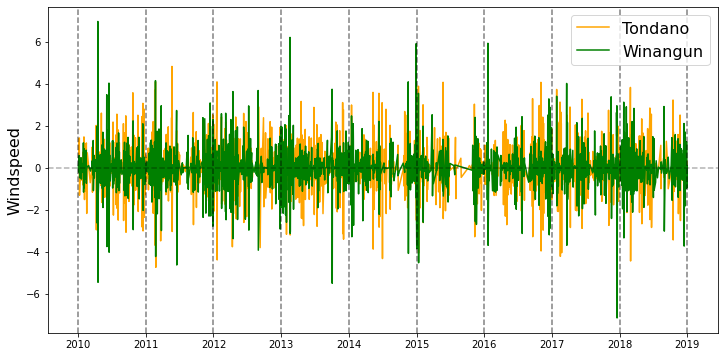

In [19]:
plot_series(dfTondano, dfWinangun)
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.savefig('output_postprocessing/sample4.png')

In [20]:
# Remove Seasonality
tondano_month_avgs = dfTondano.groupby(dfTondano.index.month).mean()
tondano_month_avgs

time
1     0.003621
2     0.030253
3    -0.036564
4     0.053354
5    -0.038041
6     0.016098
7    -0.027583
8     0.027331
9    -0.008694
10   -0.020026
11    0.013237
12   -0.013979
dtype: float64

In [21]:
winangun_month_avgs = dfWinangun.groupby(dfWinangun.index.month).mean()
winangun_month_avgs

time
1    -0.042213
2     0.013080
3    -0.009389
4    -0.006450
5    -0.008142
6     0.022393
7    -0.023922
8     0.000923
9     0.031605
10   -0.009215
11    0.004779
12    0.033867
dtype: float64

In [22]:
tondano_month_avg = dfTondano.index.map(lambda d: tondano_month_avgs.loc[d.month])
tondano_month_avg

Float64Index([0.0036214428283732796, 0.0036214428283732796,
              0.0036214428283732796, 0.0036214428283732796,
              0.0036214428283732796, 0.0036214428283732796,
              0.0036214428283732796, 0.0036214428283732796,
              0.0036214428283732796, 0.0036214428283732796,
              ...
               -0.01397906271031173,  -0.01397906271031173,
               -0.01397906271031173,  -0.01397906271031173,
               -0.01397906271031173,  -0.01397906271031173,
               -0.01397906271031173,  -0.01397906271031173,
               -0.01397906271031173,  -0.01397906271031173],
             dtype='float64', name='time', length=2161)

In [23]:
winangun_month_avg = dfWinangun.index.map(lambda d: winangun_month_avgs.loc[d.month])
winangun_month_avg

Float64Index([-0.04221308745877495, -0.04221308745877495, -0.04221308745877495,
              -0.04221308745877495, -0.04221308745877495, -0.04221308745877495,
              -0.04221308745877495, -0.04221308745877495, -0.04221308745877495,
              -0.04221308745877495,
              ...
               0.03386741083250099,  0.03386741083250099,  0.03386741083250099,
               0.03386741083250099,  0.03386741083250099,  0.03386741083250099,
               0.03386741083250099,  0.03386741083250099,  0.03386741083250099,
               0.03386741083250099],
             dtype='float64', name='time', length=1855)

In [24]:
dfTondano = dfTondano - tondano_month_avg
dfTondano

time
2010-01-06    0.447843
2010-01-07    1.415267
2010-01-08   -1.307853
2010-01-11   -0.512415
2010-01-12    0.240026
                ...   
2018-12-26    0.013979
2018-12-27   -0.396500
2018-12-28    0.359954
2018-12-29    0.142987
2018-12-30   -0.701428
Length: 2161, dtype: float64

In [25]:
dfWinangun = dfWinangun - winangun_month_avg
dfWinangun

time
2010-01-02    0.042213
2010-01-06    0.622280
2010-01-07   -0.191273
2010-01-08    0.173549
2010-01-09   -0.435703
                ...   
2018-12-27   -0.475529
2018-12-28    1.202784
2018-12-29   -1.005522
2018-12-30    0.076548
2018-12-31   -0.232615
Length: 1855, dtype: float64

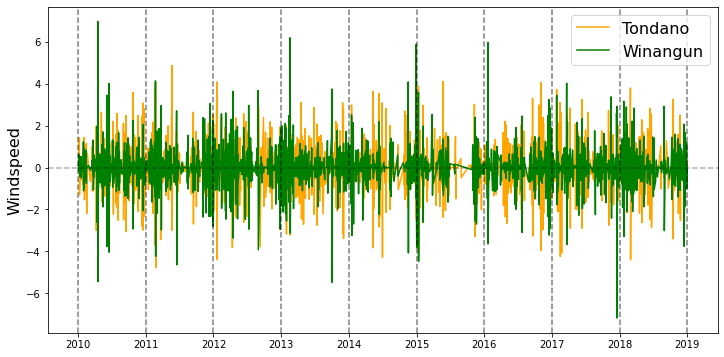

In [26]:
plot_series(dfTondano, dfWinangun)
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.savefig('output_postprocessing/sample5.png')

In [27]:
# export output preprocessing to .csv file
dfTondano.to_csv(r'output_postprocessing/postprocessing_dataset_tondano.csv', index = False)
dfWinangun.to_csv(r'output_postprocessing/postprocessing_dataset_winangun.csv', index = False)